In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

%matplotlib inline

In [2]:
data_path = './data/Ames_Housing_Data1.tsv'
housing = pd.read_csv(data_path, sep='\t')
housing.info()
housing.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2931 non-null   int64  
 1   PID              2931 non-null   int64  
 2   MS SubClass      2931 non-null   int64  
 3   MS Zoning        2931 non-null   object 
 4   Lot Frontage     2441 non-null   float64
 5   Lot Area         2931 non-null   int64  
 6   Street           2931 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2931 non-null   object 
 9   Land Contour     2931 non-null   object 
 10  Utilities        2931 non-null   object 
 11  Lot Config       2931 non-null   object 
 12  Land Slope       2931 non-null   object 
 13  Neighborhood     2931 non-null   object 
 14  Condition 1      2931 non-null   object 
 15  Condition 2      2931 non-null   object 
 16  Bldg Type        2931 non-null   object 
 17  House Style   

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000


### Exercise 1

Describe the `SalePrice` column and infer the available categories. For this we can use the `describe` method, but this shows that the data is likely not simply distributed. To get a bit more info we can also use the `value_counts()` method to see the different categories present in the data.

In [3]:
housing["SalePrice"].value_counts()

SalePrice
135000    34
140000    33
130000    29
155000    28
145000    26
          ..
97900      1
117250     1
164990     1
163990     1
173900     1
Name: count, Length: 1032, dtype: int64

## Looking for correlations

For numerical values it is easy to check visually if the variables have correlations. We can use the builtin `corr()` method on dataframes. Then we can filter by correlation strength and display only the strong correlations with seaborn.

First we visualise all correlations in a heatmap. 

Then we grab only the strongest correlations between the target variable (`SalePrice`) and all other variables. This is defined as the pearson correlation coefficient being > 0.5.

These correlations are then plotted in pair plots

<Axes: >

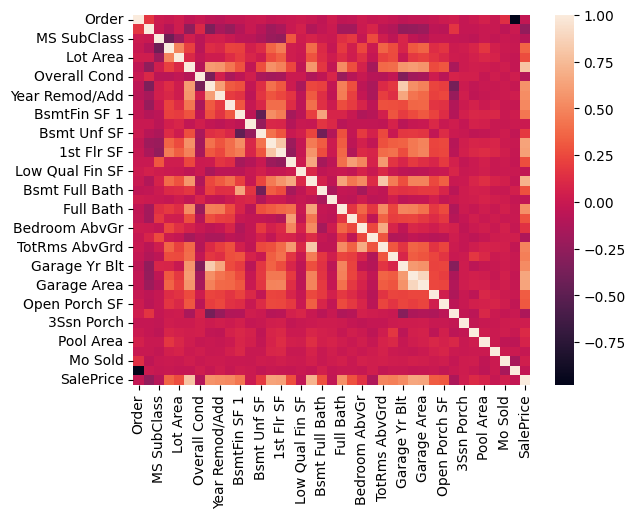

In [4]:
housing_numeric = housing.select_dtypes(['int64', 'float64'])
sns.heatmap(housing_numeric.corr())

In [5]:
# Grab all correlations with the SlaePrice as the target variable. Since the saleprice is also the 
# last column, we can easily remove it with '[:-1]'
housing_correlations = housing_numeric.corr()['SalePrice'][:-1]
top_features = housing_correlations[abs(housing_correlations) > 0.5].sort_values(ascending=False)

top_features

Overall Qual      0.799226
Gr Liv Area       0.706791
Garage Cars       0.647891
Garage Area       0.640411
Total Bsmt SF     0.632270
1st Flr SF        0.621672
Year Built        0.558340
Full Bath         0.545339
Year Remod/Add    0.532664
Garage Yr Blt     0.526808
Mas Vnr Area      0.508277
Name: SalePrice, dtype: float64

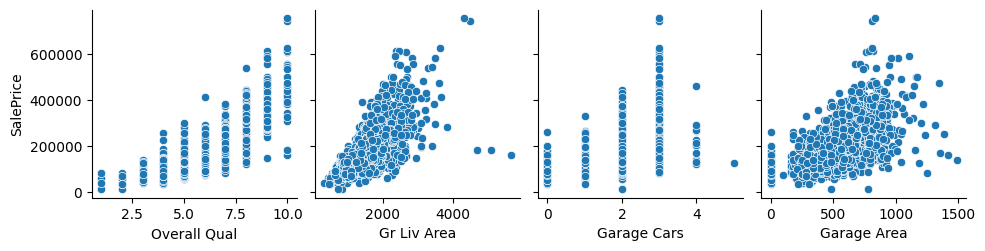

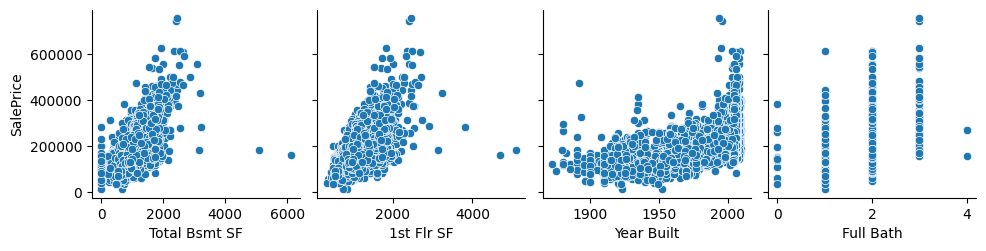

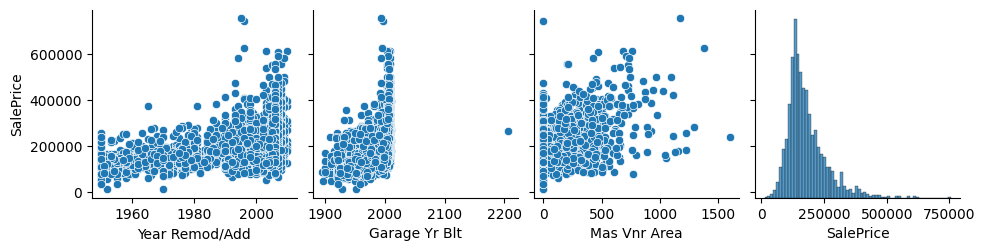

In [11]:
top_feature_columns = top_features.index.to_list() + ["SalePrice"]
for i in range(0, len(top_feature_columns), 4):
    sns.pairplot(data=housing_numeric[top_feature_columns],
                x_vars=top_feature_columns[i:i+4],
                y_vars=['SalePrice'])
    
## We could also plot all correlations, but this is not needed:
# for i in range(0, len(housing_numeric.columns), 5):
#     sns.pairplot(data=housing_numeric,
#                  x_vars=housing_numeric.columns[i:i+5],
#                  y_vars=['SalePrice'])

### Log Transformations

When data is not normally distributed we can transform the data to a more normally distributed form. This is done because the assumption of regression is that data is normally distributed. It is always possible to transform the data back to the original skew and format later after doing calculations.

The salesprice clearly shows a skew towards lower values. We can quantify this by using the `skew()` function. In this case we can simply use the `np.log()` function to remove skew ([numpy.log](https://numpy.org/doc/stable/reference/generated/numpy.log.html)).

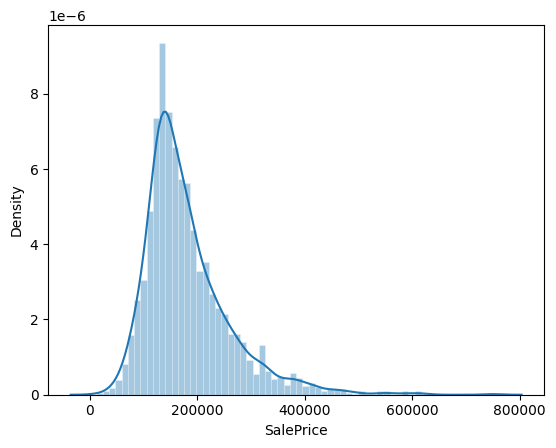

In [ ]:
# Upgrade from distplot: https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751
sns.histplot(housing['SalePrice'], 
             kde=True, stat='density', 
             kde_kws=dict(cut=3), 
             alpha=.4, 
             edgecolor=(1, 1, 1, .4))

In [17]:
print(f"Skewness: {housing['SalePrice'].skew()}")
log_transformed = np.log(housing['SalePrice'])
print(f"Skewness: {(log_transformed).skew()}")

Skewness: 1.743221853159165
Skewness: -0.015353828434352058


<Axes: xlabel='SalePrice', ylabel='Density'>

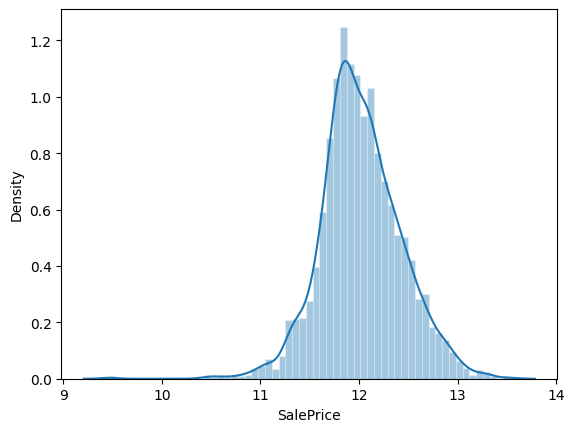

In [19]:
sns.histplot(log_transformed, 
             kde=True, stat='density', 
             kde_kws=dict(cut=3), 
             alpha=.4, 
             edgecolor=(1, 1, 1, .4))

## Exercise 2
Inspect and transform the `Lot Area` column.

The `Lot Area` column also has quite strong skew. So it also has to be transformed. Below it can clearly be seen that this results in data that is closer to normally distributed.

Skewness before: 12.778040640965061
Skewness after: -0.49463880686275796


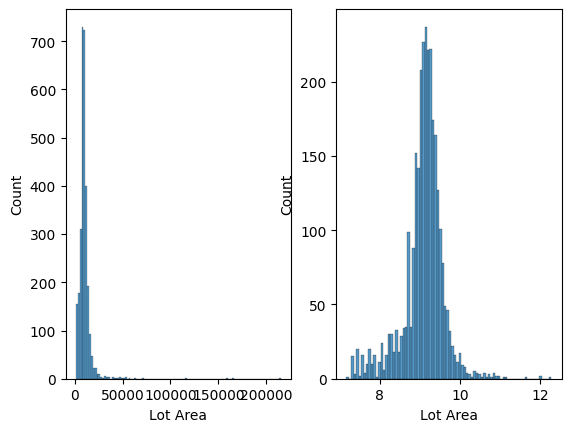

In [25]:
lot_area = housing["Lot Area"]
log_lot_area = np.log(lot_area)

fig, axes = plt.subplots(1, 2)
sns.histplot(lot_area, ax=axes[0])
sns.histplot(log_lot_area, ax=axes[1])

print(f"Skewness before: {lot_area.skew()}\nSkewness after: {log_lot_area.skew()}")

## Exercies 3

Removing Duplicates from the `Order` column.

In [28]:
removed_order_duplicates = housing.drop_duplicates(subset=["Order"])
removed_order_duplicates.index.is_unique

True

## Exercise 4

Replace missing values from `Mas Vnr Area` by the mean value.

In [ ]:
col = "Mas Vnr Area"
missing = housing[col].isnull().sum()
print(f"There are {missing} missing values in the {col} columns")

There are 0 missing values in the Mas Vnr Area columns


In [ ]:
mean = housing[col].mean()
replaced = housing[col].fillna(mean)
missing = replaced.isnull().sum()
print(f"There are {missing} missing values in the {col} columns")

There are 0 missing values in the Mas Vnr Area columns


## Exercise 5

Feature Scaling.

When using datasets as inputs for ML models it is important to scale the data such that all data is in a similar range. Otherwise it is very easy for a certain variable to dominate the result if it is much larger than the others. Usually this means that the data is normalised or standardised.

#### Normalisation
To normalise a sequence of values, simply subtract the minimum from each value and divide each value by the difference between the minimum and the maximum $X = \frac{X-X_{\text{min}}}{\Delta X}$.

This way the data will be scaled to the range $[0..1]$.

#### Standardisation
In standardisation the mean is subtracted from each value, and then divided by the standard deviation. This way the values are centered around 0, with unit variance. $X = \frac{X-\mu_X}{\sigma_X}$

#### Code
In code we can achieve this by using the `MinMaxScaler` or `StandardScaler` from the `scikit-learn` library.

For this exercise we must scale the `SalePrice` column using the `StandardScaler`. As you can see, after scaling, the column has near 0 mean and close to 1 standard deviation.

In [67]:
from IPython.display import Markdown, display

housing_col = housing['SalePrice']
display(Markdown(rf"""Before scaling:
                 $\mu$ is {housing_col.mean():.2f} 
                 $\sigma$ = {housing_col.std():.2f}"""))

col = housing_col.to_numpy().reshape(-1, 1)
scaler = StandardScaler()
# Fit and transform
scaled_col = scaler.fit_transform(col)
scaled_col = pd.Series(scaled_col.reshape(-1))
display(Markdown(rf"""After scaling:
                 $\mu$ is {scaled_col.mean():.4f} 
                 $\sigma$ = {scaled_col.std():.4f}"""))

Before scaling:
                 $\mu$ is 180807.73 
                 $\sigma$ = 79875.56

After scaling:
                 $\mu$ is 0.0000 
                 $\sigma$ = 1.0002

## Exercise 6

Outliers.

By inspecting the data, it is often already very easy to see common issues. Like we've seen before, skewed data, or large values can be spotted. Which both can influence learning performance.

The same is true for outliers. Since we want to end up with a model that has repeatable, generalisable behaviour, outliers can break this by breaking the pattern. Outliers can be disproportionally weighted by a model during training which can cause unwanted results. 
Usually, outliers can be removed from a dataset without loss of generality and training data quality.

In this exercise we inspect the correlation between the `Lot Area` and `SalePrice` columns. Below you can see that there are a few datapoints to the right that fall outside the trend. If we were to take these datapoints into training, the model would not be able to learn the correct trend, especially for simpler models. So we will remove these values.

<Axes: xlabel='Lot Area', ylabel='SalePrice'>

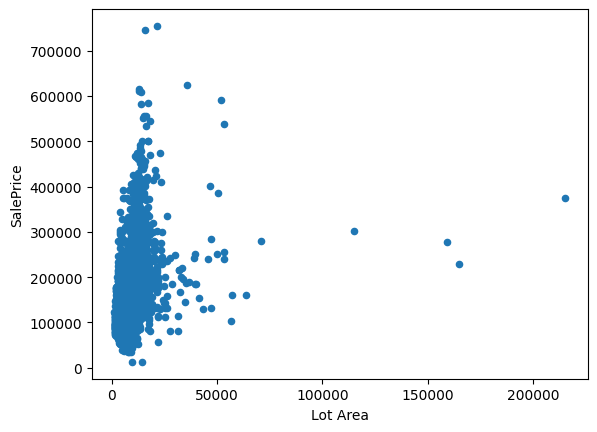

In [70]:
housing.plot.scatter(x="Lot Area", y="SalePrice")

From the above plot we can see that the four datapoints on the right are clearly outside the trend. There are a few more datapoints between 50000 and 100000 that might be outliers. But since they are still quite well connected to the rest of the datapoints we'll keep them here.

<Axes: xlabel='Lot Area', ylabel='SalePrice'>

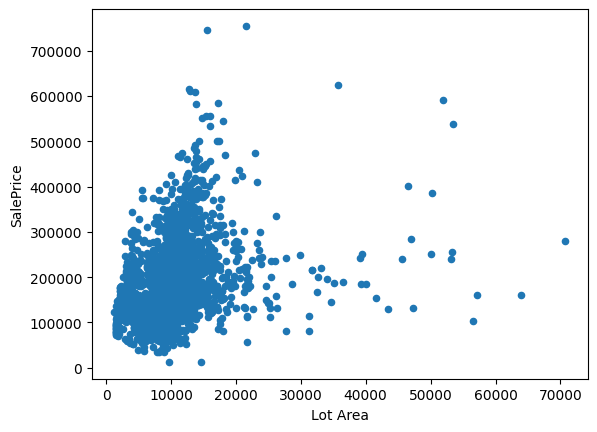

In [74]:
housing_lot_area_drop = housing[housing['Lot Area'] < 100_000]
housing_lot_area_drop.plot.scatter(x="Lot Area", y="SalePrice")